# Data Cleaning and Analysis

Additional Informations:
* Data scource: https://www.kaggle.com/datasets/mosapabdelghany/adult-income-prediction-dataset/data
* In the Income column, 0 represents '<=50K' and 1 represents '>50K'.

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# setting display options
pd.options.display.expand_frame_repr = False
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100

### Loading Dataset

In [2]:
raw_df = pd.read_csv(r'income.csv')
raw_df.info()
raw_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Data Cleaning

Renaming Columns

In [3]:
for column_name in raw_df:
    new_column_name = column_name.replace('.','_')
    raw_df.rename(columns={column_name:new_column_name.capitalize()}, inplace=True)

raw_df.rename(columns={'Workclass':'Work_class'},inplace=True)
raw_df.rename(columns={'Fnlwgt':'Final_weight'},inplace=True)
raw_df.rename(columns={'Education_num':'Education_level'},inplace=True)

Correcting Column Values

In [4]:
# Separating numerical and categorical columns
num_columns = raw_df.select_dtypes(include=['int64']).columns.tolist()
cat_columns = raw_df.select_dtypes(include=['object']).columns.tolist()

In [5]:
# Converting Strings to UPPER CASE
for column in cat_columns:
    raw_df[column] = raw_df[column].str.upper()

In [6]:
# Replacing '?' with OTHER in all columns
raw_df = raw_df.replace(to_replace='?', value='OTHER')

In [7]:
# Replacing values in Income to 0 (for <=50K) and 1 (for >50K)
income_dict = {'<=50K': 0, '>50K': 1}
raw_df['Income'] = raw_df['Income'].replace(income_dict)

C:\Users\cyria\AppData\Local\Temp\ipykernel_5680\4011102744.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_df['Income'] = raw_df['Income'].replace(income_dict)


Fixing Null Values

In [8]:
# Checking for Null values
print(raw_df.isna().sum())

Age                0
Work_class         0
Final_weight       0
Education          0
Education_level    0
Marital_status     0
Occupation         0
Relationship       0
Race               0
Sex                0
Capital_gain       0
Capital_loss       0
Hours_per_week     0
Native_country     0
Income             0
dtype: int64


Fixing Duplicates

In [9]:
# Checking for duplicates
print('Duplicate rows:', raw_df.duplicated().sum())

Duplicate rows: 24


In [10]:
# Removing duplicates
raw_df = raw_df.drop_duplicates()

In [11]:
# Checking again for duplicates
print('Duplicate rows:', raw_df.duplicated().sum())

Duplicate rows: 0


In [12]:
# Saving cleaned dataset
raw_df.to_csv('processed.csv', index=False)

### Exploratory Data Analysis

In [13]:
# Loading cleaned dataset
raw_df = pd.read_csv(r'processed.csv')
raw_df.info()
raw_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32537 non-null  int64 
 1   Work_class       32537 non-null  object
 2   Final_weight     32537 non-null  int64 
 3   Education        32537 non-null  object
 4   Education_level  32537 non-null  int64 
 5   Marital_status   32537 non-null  object
 6   Occupation       32537 non-null  object
 7   Relationship     32537 non-null  object
 8   Race             32537 non-null  object
 9   Sex              32537 non-null  object
 10  Capital_gain     32537 non-null  int64 
 11  Capital_loss     32537 non-null  int64 
 12  Hours_per_week   32537 non-null  int64 
 13  Native_country   32537 non-null  object
 14  Income           32537 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


,Age,Work_class,Final_weight,Education,Education_level,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,90,OTHER,77053,HS-GRAD,9,WIDOWED,OTHER,NOT-IN-FAMILY,WHITE,FEMALE,0,4356,40,UNITED-STATES,0
1,82,PRIVATE,132870,HS-GRAD,9,WIDOWED,EXEC-MANAGERIAL,NOT-IN-FAMILY,WHITE,FEMALE,0,4356,18,UNITED-STATES,0
2,66,OTHER,186061,SOME-COLLEGE,10,WIDOWED,OTHER,UNMARRIED,BLACK,FEMALE,0,4356,40,UNITED-STATES,0
3,54,PRIVATE,140359,7TH-8TH,4,DIVORCED,MACHINE-OP-INSPCT,UNMARRIED,WHITE,FEMALE,0,3900,40,UNITED-STATES,0
4,41,PRIVATE,264663,SOME-COLLEGE,10,SEPARATED,PROF-SPECIALTY,OWN-CHILD,WHITE,FEMALE,0,3900,40,UNITED-STATES,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32532,22,PRIVATE,310152,SOME-COLLEGE,10,NEVER-MARRIED,PROTECTIVE-SERV,NOT-IN-FAMILY,WHITE,MALE,0,0,40,UNITED-STATES,0
32533,27,PRIVATE,257302,ASSOC-ACDM,12,MARRIED-CIV-SPOUSE,TECH-SUPPORT,WIFE,WHITE,FEMALE,0,0,38,UNITED-STATES,0
32534,40,PRIVATE,154374,HS-GRAD,9,MARRIED-CIV-SPOUSE,MACHINE-OP-INSPCT,HUSBAND,WHITE,MALE,0,0,40,UNITED-STATES,1
32535,58,PRIVATE,151910,HS-GRAD,9,WIDOWED,ADM-CLERICAL,UNMARRIED,WHITE,FEMALE,0,0,40,UNITED-STATES,0


Describe

In [14]:
raw_df.describe()

,Age,Final_weight,Education_level,Capital_gain,Capital_loss,Hours_per_week,Income
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329,0.240926
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889,0.427652
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Correlation

                      Age  Final_weight  Education_level  Capital_gain  Capital_loss  Hours_per_week    Income
Age              1.000000     -0.076447         0.036224      0.077676      0.057745        0.068515  0.234037
Final_weight    -0.076447      1.000000        -0.043388      0.000429     -0.010260       -0.018898 -0.009502
Education_level  0.036224     -0.043388         1.000000      0.122664      0.079892        0.148422  0.335272
Capital_gain     0.077676      0.000429         0.122664      1.000000     -0.031639        0.078408  0.223336
Capital_loss     0.057745     -0.010260         0.079892     -0.031639      1.000000        0.054229  0.150501
Hours_per_week   0.068515     -0.018898         0.148422      0.078408      0.054229        1.000000  0.229658
Income           0.234037     -0.009502         0.335272      0.223336      0.150501        0.229658  1.000000


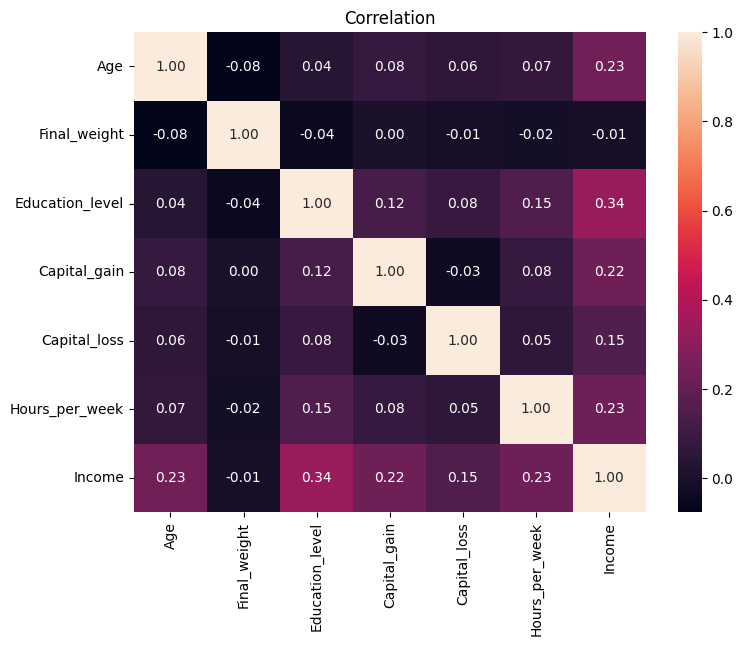

In [15]:
print(raw_df.corr(numeric_only=True))
ax = plt.axes((0,0,1,1))
sns.heatmap(raw_df.corr(numeric_only=True), annot=True, fmt='.2f', ax=ax)
plt.title('Correlation')
plt.show()

Covariance

In [16]:
raw_df.cov(numeric_only=True)

,Age,Final_weight,Education_level,Capital_gain,Capital_loss,Hours_per_week,Income
Age,185.994594,-1.100517e+05,1.270447,7.826382e+03,317.454068,11.536939,1.364977
Final_weight,-110051.688494,1.114217e+10,-11777.880524,3.342341e+05,-436568.823027,-24629.699183,-428.949578
Education_level,1.270447,-1.177788e+04,6.613296,2.330502e+03,82.818379,4.712652,0.368719
Capital_gain,7826.382249,3.342341e+05,2330.502298,5.458191e+07,-94224.613427,7152.207079,705.625846
Capital_loss,317.454068,-4.365688e+05,82.818379,-9.422461e+04,162491.087819,269.901814,25.944414
Hours_per_week,11.536939,-2.462970e+04,4.712652,7.152207e+03,269.901814,152.445672,1.212634
Income,1.364977,-4.289496e+02,0.368719,7.056258e+02,25.944414,1.212634,0.182886


Distribution

In [17]:
# # Pair plot and distribution of numberical columns
# plot_kws = {'s': 25, 'edgecolor': 'k', 'linewidth': 0.4}
# sns.pairplot(raw_df, hue ='Income', palette='gist_heat_r', plot_kws=plot_kws)
# plt.show()

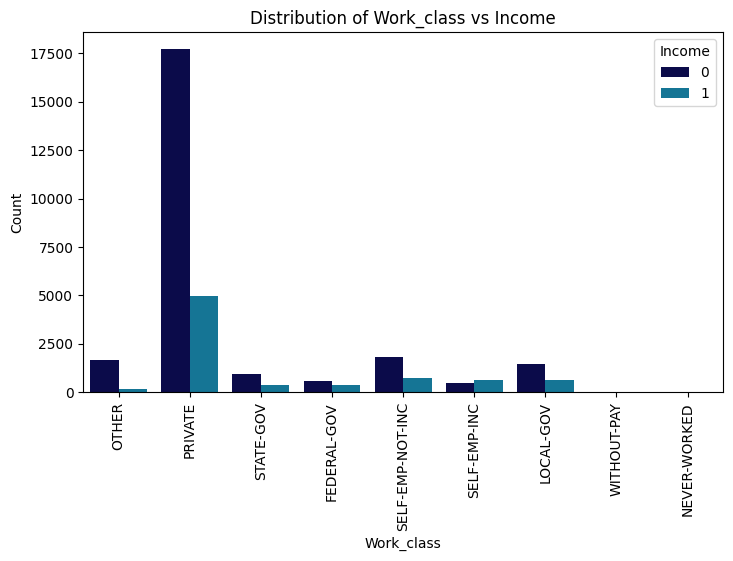

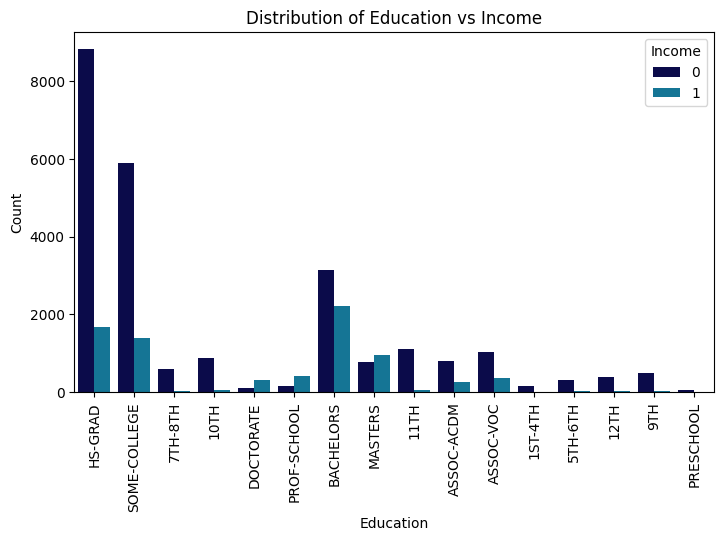

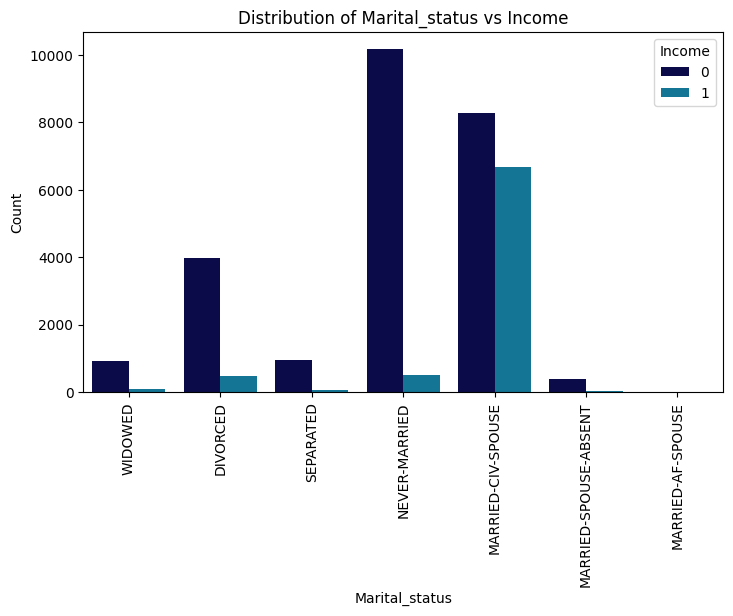

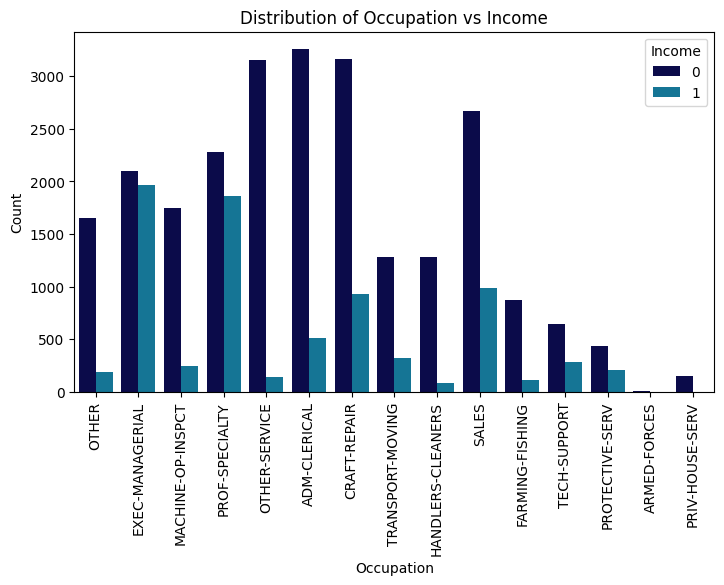

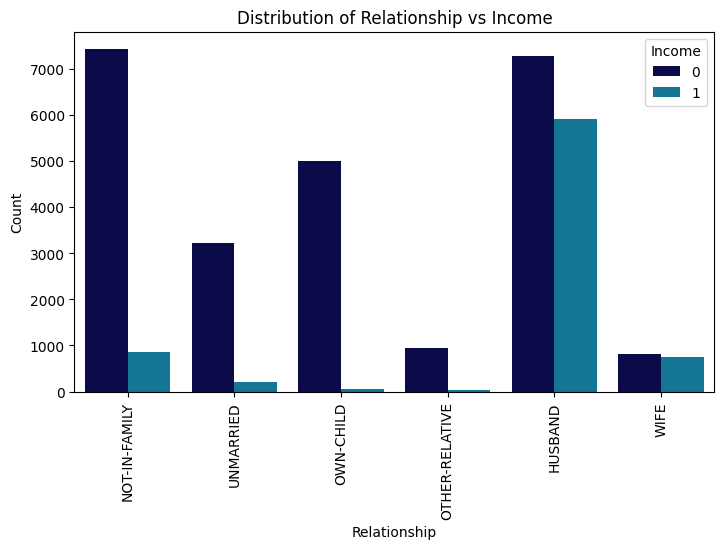

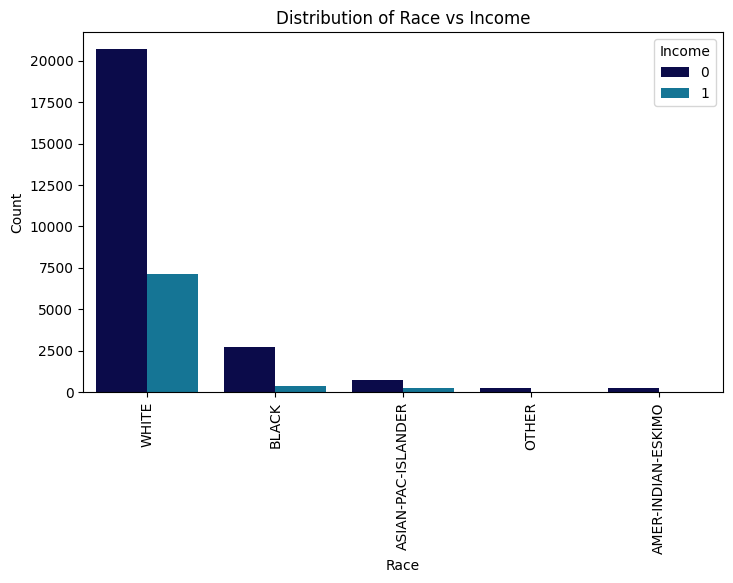

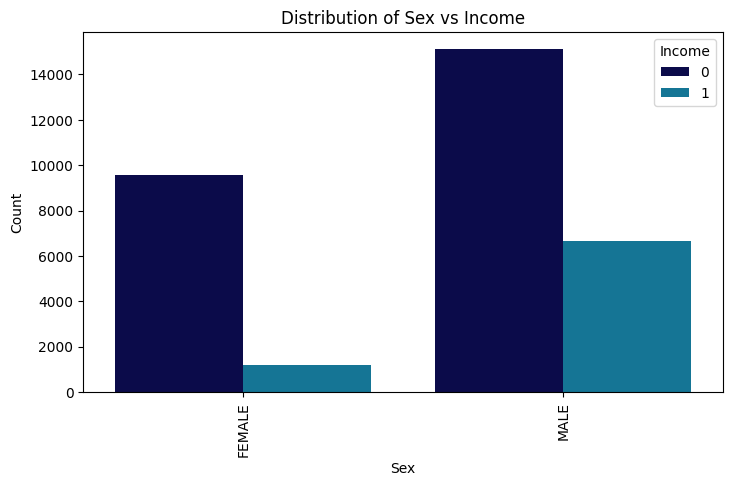

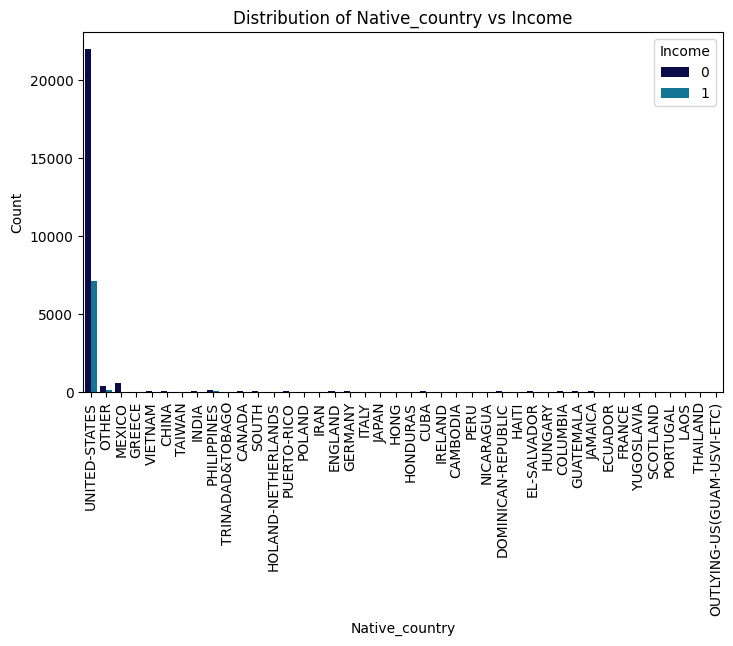

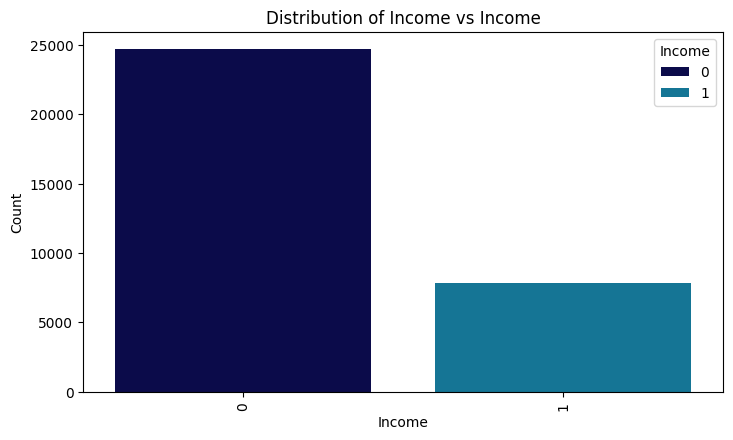

In [18]:
# Distribution of Categorical columns
for column in cat_columns:
    ax = plt.axes((0,0,1,0.75))
    sns.countplot(data=raw_df, x=column, hue='Income', palette='ocean', ax=ax)
    ax.set_title(f'Distribution of {column} vs Income')
    ax.set_xlabel(f'{column}')
    plt.xticks(rotation=90)
    ax.set_ylabel('Count')
    ax.legend(title='Income')
    plt.show()

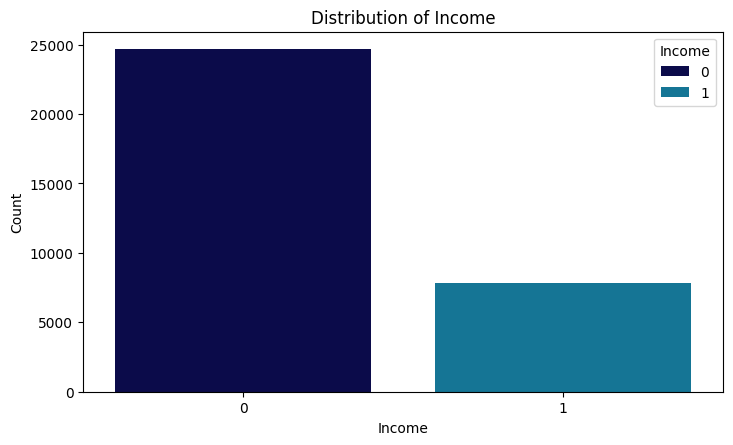

In [19]:
# Distribution of Income
ax = plt.axes((0,0,1,0.75))
sns.countplot(data=raw_df, x='Income', hue='Income', palette='ocean', ax=ax)
ax.set_title(f'Distribution of Income')
ax.set_xlabel(f'Income')
ax.set_ylabel('Count')
plt.show()

### Conclusions

The following can be concluded from the above analysis:
1. Most of the individuals who earn >50K are middle-aged people.
2. Highly paid individuals also have higher level of education on average.